In [1]:
#this is a simple data science project
#it uses the iris dataset to make predictions and classify flowers
#Author: Immanuella Duke
!pip install fastapi uvicorn

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


In [16]:
import nest_asyncio
nest_asyncio.apply()

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.linear_model import *

In [3]:
iris = pd.read_csv('data/iris.csv')

In [4]:
iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [5]:
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [6]:
iris.mean()


Id               75.500000
SepalLengthCm     5.843333
SepalWidthCm      3.054000
PetalLengthCm     3.758667
PetalWidthCm      1.198667
dtype: float64

Text(0.5, 0.98, 'Plot for species')

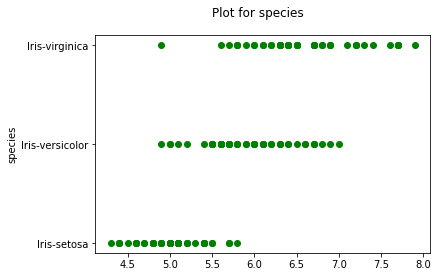

In [7]:
plt.plot(iris.SepalLengthCm, iris.Species, 'go')
plt.ylabel('species')
plt.suptitle('Plot for species')

In [8]:
#classification algorithms for python

#K nearest neighbours
#4 features and 1 label

sepal_length = iris.SepalLengthCm
sepal_width = iris.SepalWidthCm
petal_length = iris.PetalLengthCm
petal_width = iris.PetalWidthCm

species = iris.Species

#encoding the string columns
#creating a label encoder
le = preprocessing.LabelEncoder()
species_encoded = le.fit_transform(species)

#features list
features_list = list(zip(sepal_length, sepal_width, petal_length, petal_width))

model = KNeighborsClassifier(n_neighbors = 3)


model.fit(features_list, species_encoded)

#print("Find out what type of flower you have? ")
#sepal_l = eval(input("Enter the sepal length: "))
#sepal_w =  eval(input("Enter the sepal width: "))
#petal_l =  eval(input("Enter the petal length: "))
#petal_w =  eval(input("Enter the petal width: "))



predicted = model.predict([[sepal_l, sepal_w, petal_l, petal_w]]) 


if (predicted == 0):
    print('This flower is iris-setosa')
elif (predicted == 1):
    print ('This flower is iris versicolor')
else:
    print('This flower is iris virginica')


Find out what type of flower you have? 
Enter the sepal length: 2
Enter the sepal width: 3
Enter the petal length: 4
Enter the petal width: 6
This flower is iris virginica


In [13]:
predicted

array([2])

In [12]:
#save pickle file
import pickle
pickle_out = open("iris.pkl", 'wb')
pickle.dump(model, pickle_out)
pickle_out.close()

In [9]:
#measuring the accuracy using all the data
ypred = model.predict(features_list)
print("Performance of model using all data: ", metrics.accuracy_score(species_encoded, ypred))

Performance of model using all data:  0.96


In [10]:
#next step is to use a train/test split 
iris = pd.read_csv('data/iris.csv')
size = 100

#setting frac to 1 gives back the whole sample of data but in a randomized form, 
#setting dropped to true, drops the original indexes
shuffled_iris = iris.sample(frac = 1).reset_index(drop=True)

#training set features and labels
train_set_x = shuffled_iris.loc[1:size, ["SepalLengthCm", "SepalWidthCm","PetalLengthCm",  "PetalWidthCm"]]
train_set_y = shuffled_iris.loc[1:size, ["Species"]]

#test set features and labels
test_set_x = shuffled_iris.loc[size:,["SepalLengthCm", "SepalWidthCm","PetalLengthCm",  "PetalWidthCm"]]
test_set_y = shuffled_iris.loc[size:, ["Species"]]


#let's use logistic regression this time

lmodel = LogisticRegression(random_state=0, solver='lbfgs', multi_class='auto', max_iter = 200)
lmodel.fit(train_set_x, np.ravel(train_set_y))

y_pred = lmodel.predict(test_set_x)

print("Performance of model using train-test split: ", metrics.accuracy_score(test_set_y, y_pred))



Performance of model using train-test split:  0.98


In [11]:
#done with the project: used K nearest neighbours and logistic regression to work on iris data set. 
#evaluated the models too. 0.96 on overfit model and 0.98 on train-test split model. Hurray!